In [1]:
from skimage import io, color, morphology
from skimage.util import img_as_float, img_as_ubyte
import matplotlib.pyplot as plt
import numpy as np
import math
from skimage.filters import threshold_otsu
from skimage import segmentation
from skimage import measure
from skimage.color import label2rgb

In [2]:
def show_comparison(original, modified, modified_name):
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(16, 8), sharex=True,
                                   sharey=True)
    ax1.imshow(original, cmap=plt.cm.gray)
    ax1.set_title('Original')
    ax1.axis('off')
    ax2.imshow(modified, cmap=plt.cm.gray)
    ax2.set_title(modified_name)
    ax2.axis('off')
    io.show()

# Exercise 1

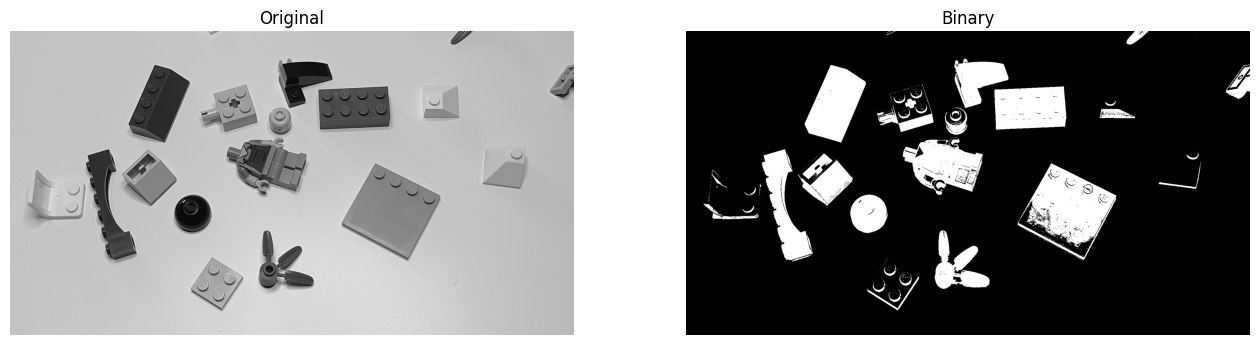

In [3]:
im_org = io.imread("data/lego_4_small.png", as_gray=True)
otsu_im_org = threshold_otsu(im_org)
bin_im_org = im_org < otsu_im_org
show_comparison(im_org, bin_im_org, "Binary")

# Exercise 2
It seems like the items touching the border are removed. Look at the top right corner

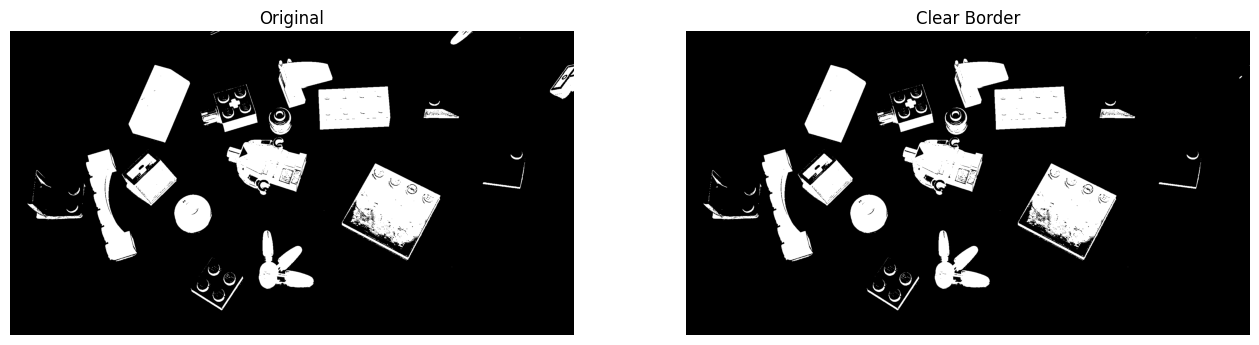

In [4]:
bin_seg = segmentation.clear_border(bin_im_org)
show_comparison(bin_im_org, bin_seg, "Clear Border")

# Exercise 3

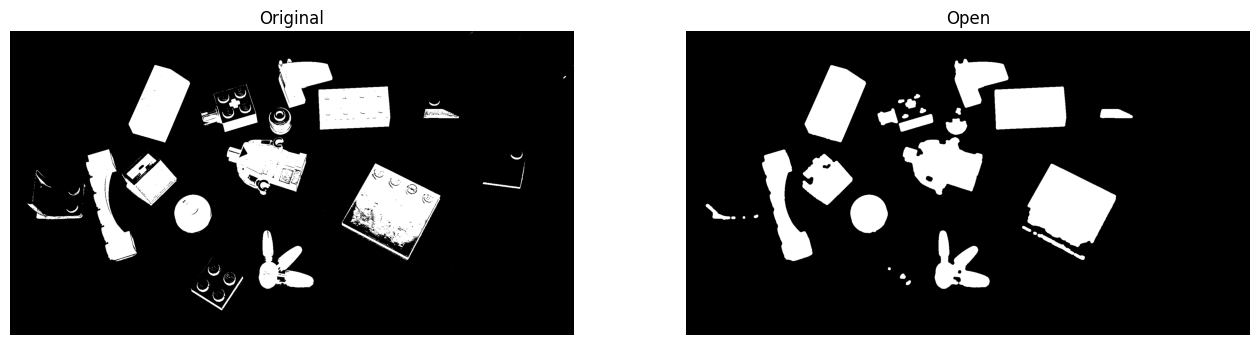

In [5]:
disk = morphology.disk(5)
bin_close = morphology.binary_closing(bin_seg, disk)
bin_open = morphology.binary_opening(bin_close, disk)
show_comparison(bin_seg, bin_open, "Open")

# Exercise 4

In [6]:
label_img = measure.label(bin_open)
n_labels = label_img.max()
print(f"Number of labels: {n_labels}")

Number of labels: 29


# Exercise 5

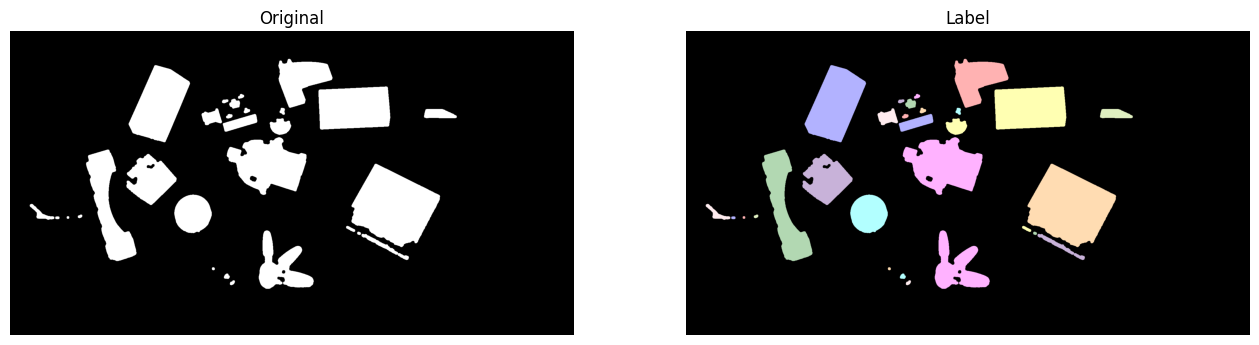

In [7]:
label2rgb_img = label2rgb(label_img, image=bin_open)
show_comparison(bin_open, label2rgb_img, "Label")


# Exercise 6

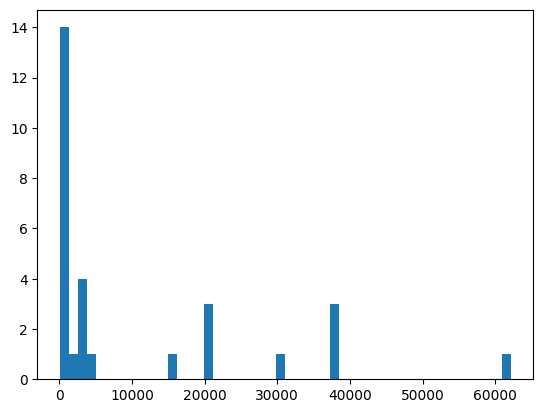

In [8]:
region_props = measure.regionprops(label_img)
areas = np.array([prop.area for prop in region_props])
plt.hist(areas, bins=50)
plt.show()

# Exercise 7
Very cool program, can hover mouse and see stats on the blobs

# Exercise 8

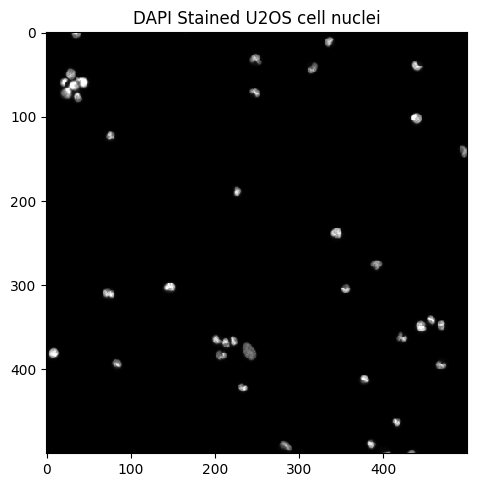

In [9]:
in_dir = "data/"
img_org = io.imread(in_dir + 'Sample E2 - U2OS DAPI channel.tiff')
# slice to extract smaller image
img_small = img_org[700:1200, 900:1400]
img_gray = img_as_ubyte(img_small) 
io.imshow(img_gray, vmin=0, vmax=100)
plt.title('DAPI Stained U2OS cell nuclei')
io.show()

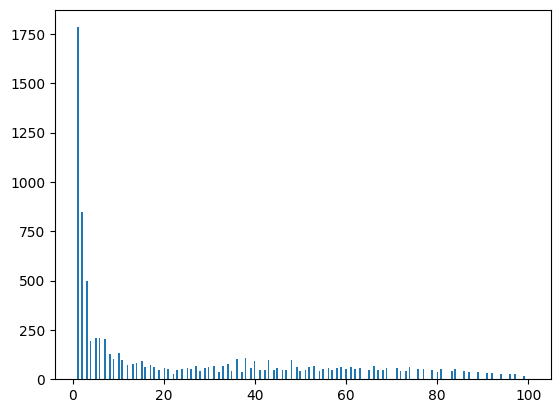

In [10]:
# avoid bin with value 0 due to the very large number of background pixels
plt.hist(img_gray.ravel(), bins=256, range=(1, 100))
io.show()

# Exercise 8

Threshold 30


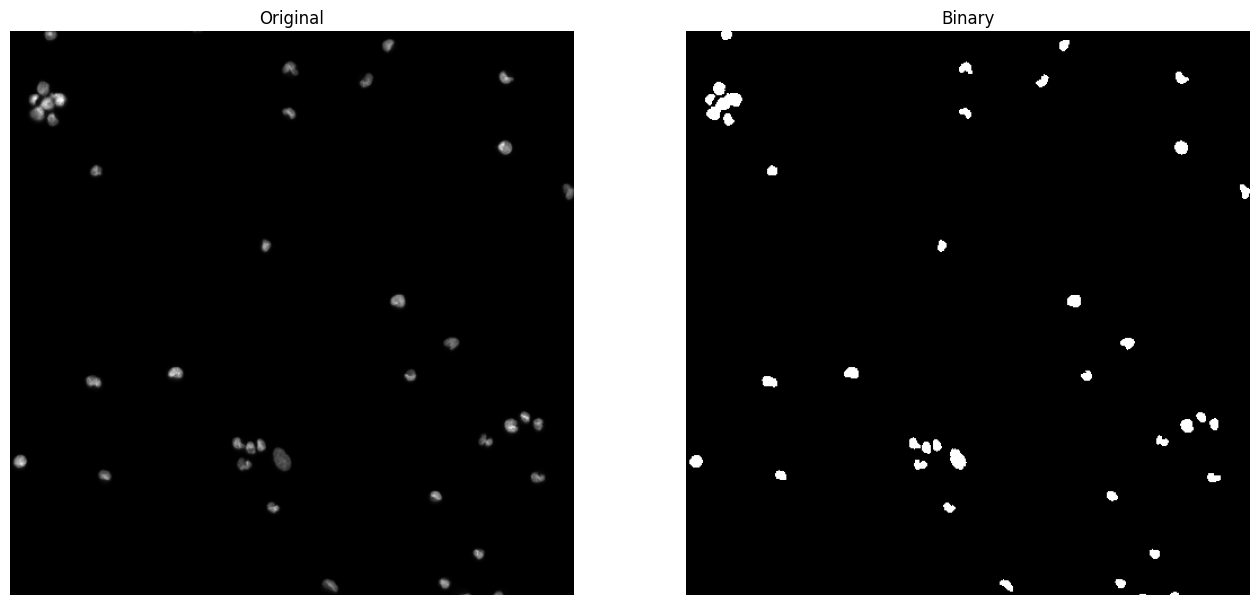

In [11]:
otsu = threshold_otsu(img_gray)
print("Threshold", otsu)
img_bin = img_gray > otsu
show_comparison(img_gray, img_bin, "Binary")

# Exercise 9

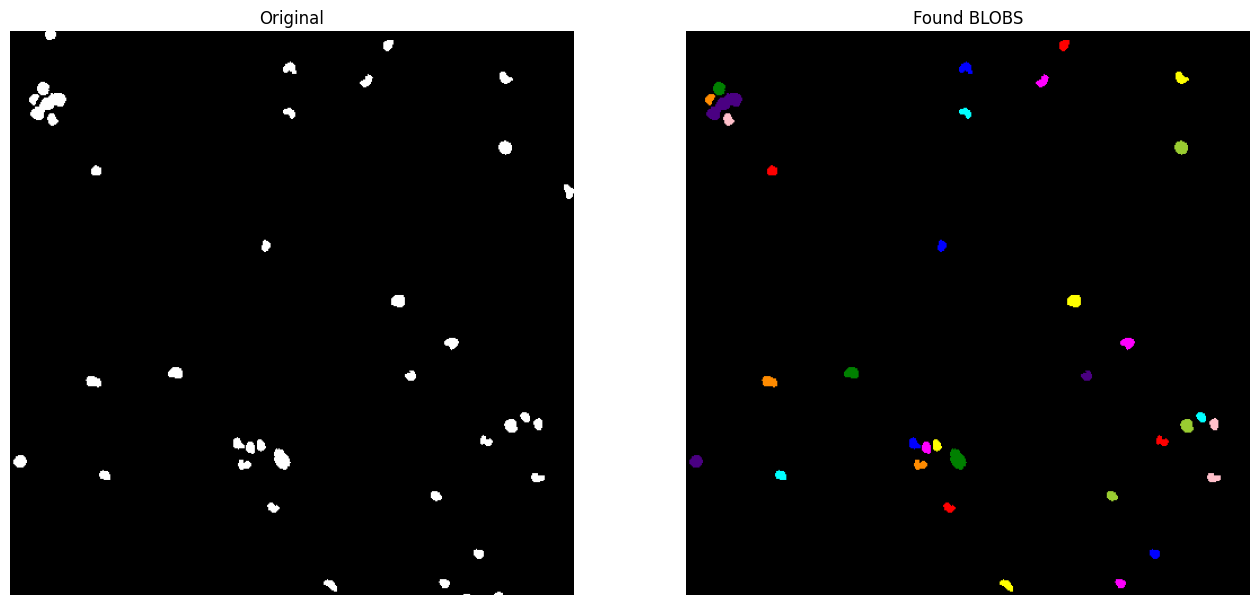

In [12]:
img_c_b = segmentation.clear_border(img_bin)

label_img = measure.label(img_c_b)
image_label_overlay = label2rgb(label_img)
show_comparison(img_bin, image_label_overlay, 'Found BLOBS')

# Exercise 10

In [13]:
region_props = measure.regionprops(label_img)
print("Area:", region_props[0].area)

Area: 71.0


In [14]:
areas = np.array([prop.area for prop in region_props])
areas

array([ 71.,  88.,  84.,  78., 104., 360.,  60.,  68.,  76., 115.,  67.,
        63., 114.,  93., 107.,  66., 106.,  61.,  68., 111.,  68.,  73.,
        64.,  71., 192., 103.,  78.,  69.,  73.,  68.,  65.,  63.,  75.,
        60.])

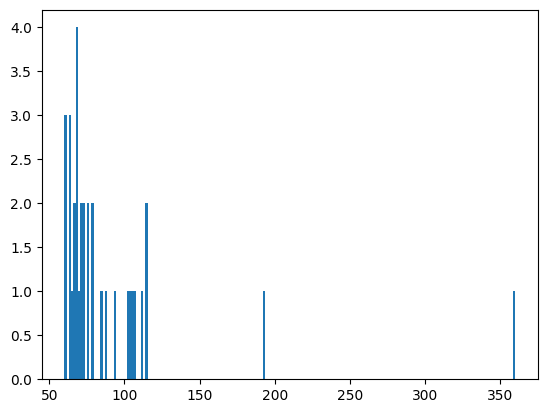

In [15]:
plt.hist(areas, bins=200)
plt.show()

# Exercise 11

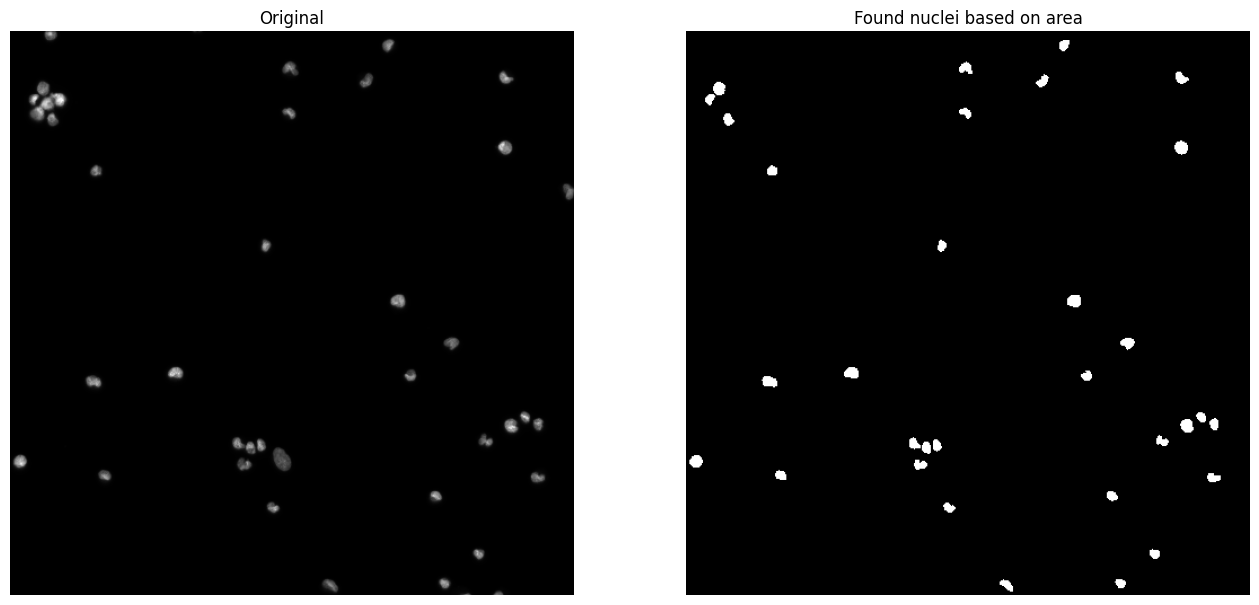

In [16]:
min_area = 50
max_area = 150

# Create a copy of the label_img
label_img_filter = label_img
for region in region_props:
	# Find the areas that do not fit our criteria
	if region.area > max_area or region.area < min_area:
		# set the pixels in the invalid areas to background
		for cords in region.coords:
			label_img_filter[cords[0], cords[1]] = 0
# Create binary image from the filtered label image
i_area = label_img_filter > 0
show_comparison(img_small, i_area, 'Found nuclei based on area')

It is hard to find a correct min/max area since i don't know what counts as a nucleaus and what doesn't

# Exercise 12

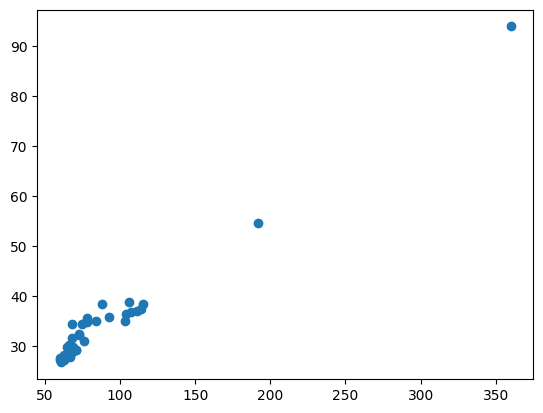

In [17]:
perimeters = np.array([prop.perimeter for prop in region_props])

# Plot area vs perimeter
plt.scatter(areas, perimeters)


# Exercise 13

(array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 1., 0., 1., 0., 0., 1., 1., 0., 2., 0., 0., 0., 2., 1., 2., 0.,
        0., 3., 0., 0., 0., 0., 1., 2., 4., 1., 2., 3., 2., 1., 1., 2.]),
 array([0.51372491, 0.52508367, 0.53644243, 0.5478012 , 0.55915996,
        0.57051872, 0.58187748, 0.59323625, 0.60459501, 0.61595377,
        0.62731253, 0.63867129, 0.65003006, 0.66138882, 0.67274758,
        0.68410634, 0.69546511, 0.70682387, 0.71818263, 0.72954139,
        0.74090016, 0.75225892, 0.76361768, 0.77497644, 0.7863352 ,
        0.79769397, 0.80905273, 0.82041149, 0.83177025, 0.84312902,
        0.85448778, 0.86584654, 0.8772053 , 0.88856407, 0.89992283,
        0.91128159, 0.92264035, 0.93399911, 0.94535788, 0.95671664,
        0.9680754 , 0.97943416, 0.99079293, 1.00215169, 1.01351045,
        1.02486921, 1.03622798, 1.04758674, 1.0589455 , 1.07030426,
        1.08166302]),
 <BarContainer object of 50 artists>)

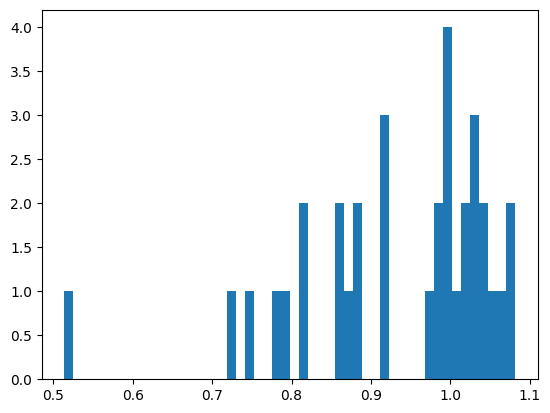

In [18]:
circularity = np.array([4 * math.pi * prop.area / (prop.perimeter ** 2) for prop in region_props])

# Plot histogram of circularity
plt.hist(circularity, bins=50)

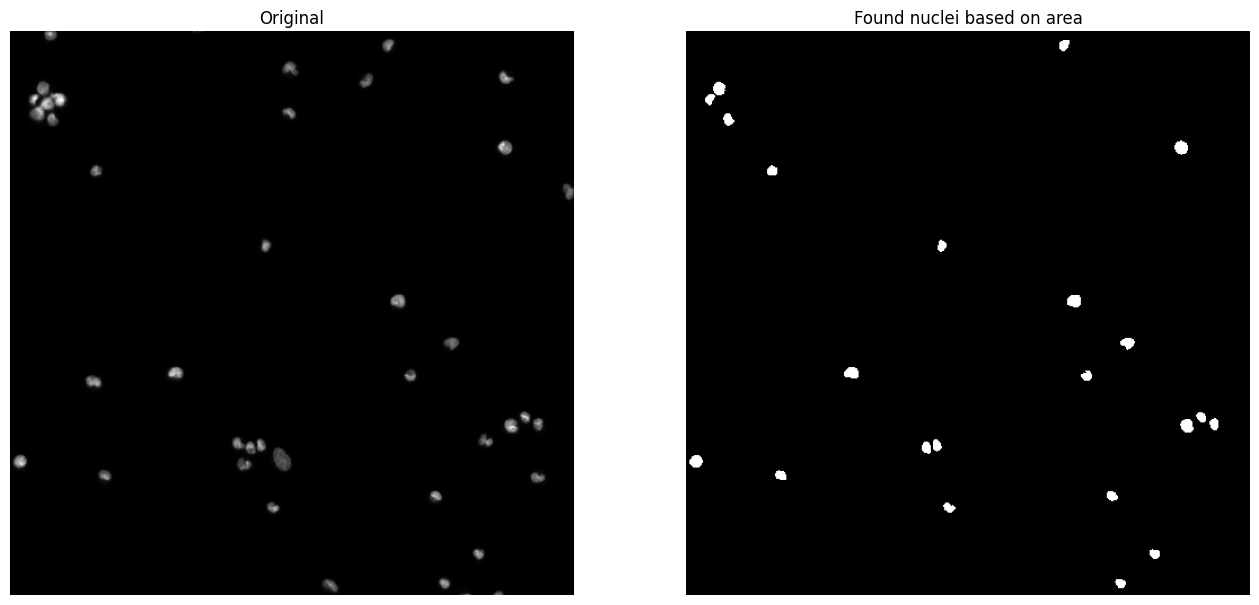

In [19]:
min_circularity = 0.9

# Create a copy of the label_img
label_img_circ = label_img
count=0
for region in region_props:
	circ = 4 * math.pi * region.area / region.perimeter ** 2
	# Find the areas that do not fit our criteria
	if circ < min_circularity:
		# set the pixels in the invalid areas to background
		for cords in region.coords:
			label_img_circ[cords[0], cords[1]] = 0
	else:
		count+=1
# Create binary image from the filtered label image
i_area = label_img_circ > 0
show_comparison(img_small, i_area, 'Found nuclei based on area')

# Exercise 14
The small nuclei are generally more circular

Text(0, 0.5, 'Circularity')

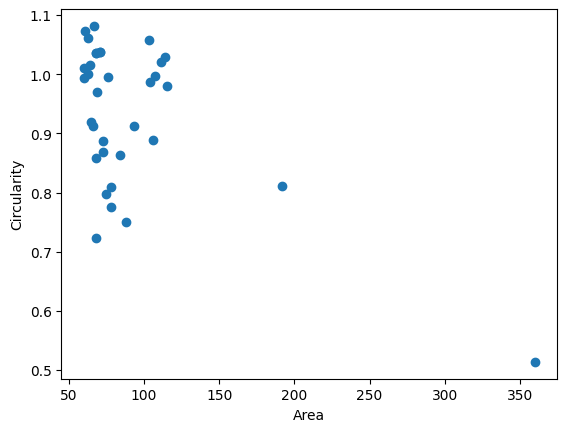

In [20]:
# Plot area vs circularity
plt.scatter(areas, circularity)
plt.xlabel('Area')
plt.ylabel('Circularity')

In [21]:
print(f"Number of nuclei: {count}")

Number of nuclei: 22


# Exercise 15
I am too lazy

# Exercise 16

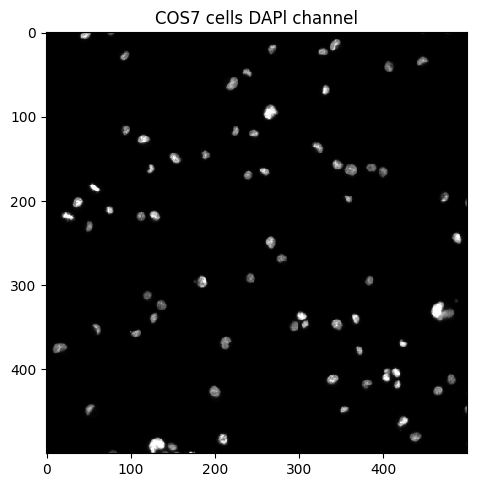

In [22]:
in_dir = "data/"
img_org = io.imread(in_dir + 'Sample G1 - COS7 cells DAPI channel.tiff')
# slice to extract smaller image
img_small = img_org[700:1200, 900:1400]
img_gray = img_as_ubyte(img_small) 
io.imshow(img_gray, vmin=0, vmax=100)
plt.title('COS7 cells DAPl channel')
io.show()

Threshold 29


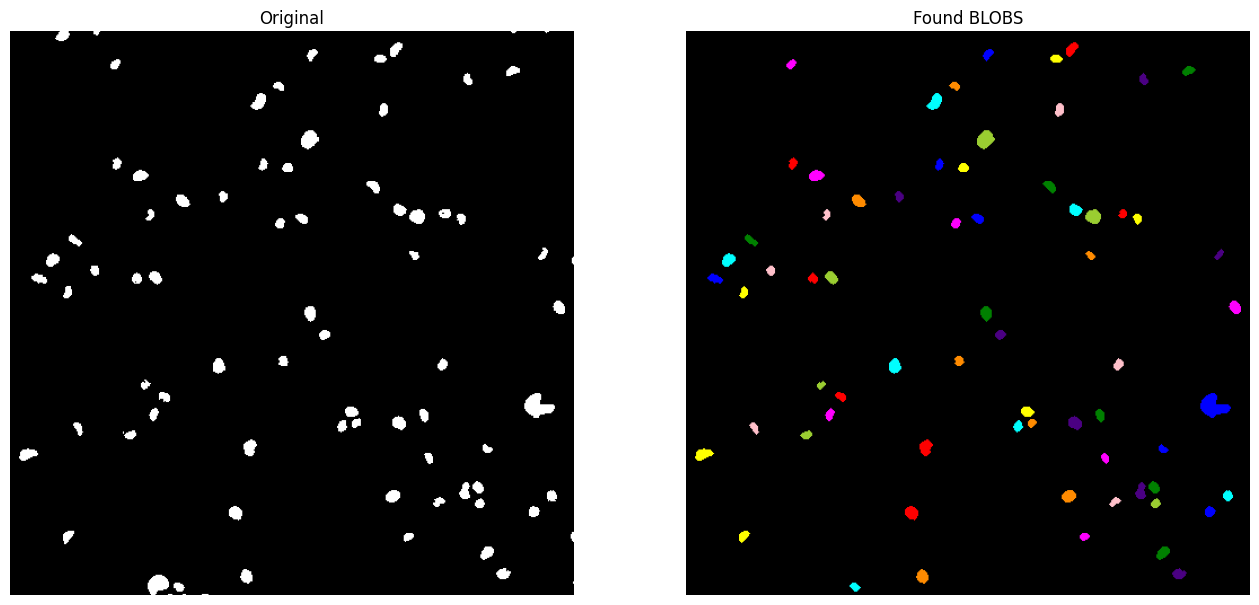

In [23]:
# Apply threshold
otsu = threshold_otsu(img_gray)
print("Threshold", otsu)
img_bin = img_gray > otsu

# Remove border
img_c_b = segmentation.clear_border(img_bin)

# Open the image
disk = morphology.disk(2)
img_open = morphology.binary_opening(img_c_b, disk)

# Label the images
label_img = measure.label(img_open)
image_label_overlay = label2rgb(label_img)

show_comparison(img_bin, image_label_overlay, 'Found BLOBS')

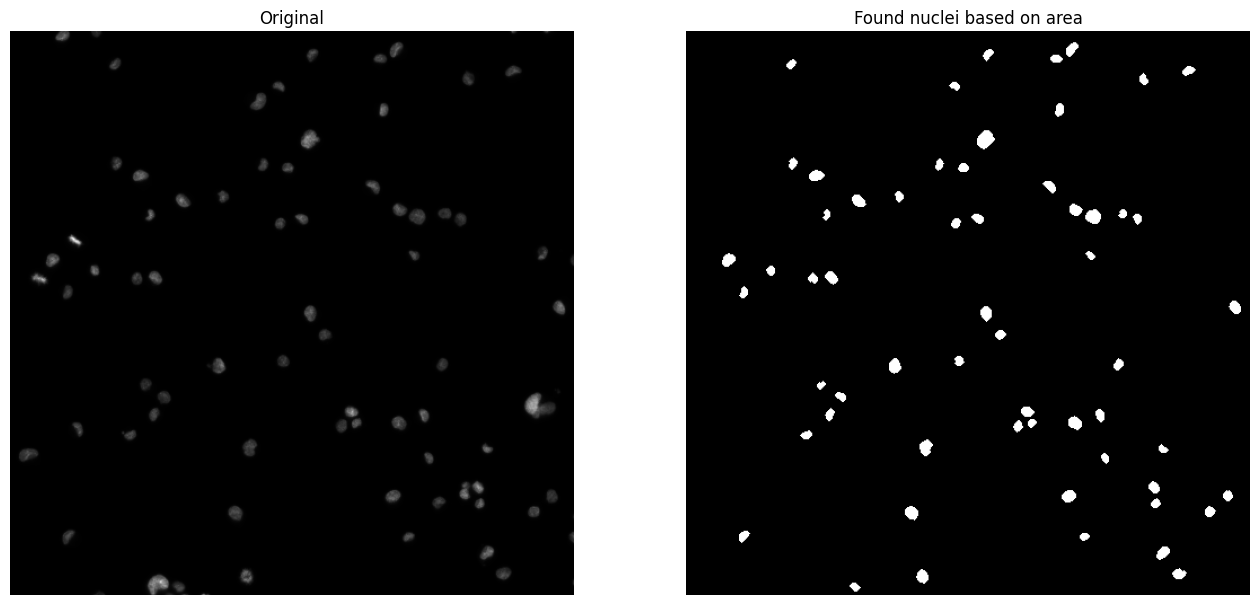

In [24]:
# Get properties of the regions
region_props = measure.regionprops(label_img)
areas = np.array([prop.area for prop in region_props])

# Remove non-circle regions
min_circularity = 0.9
label_img_circ = label_img
count=0
for region in region_props:
	circ = 4 * math.pi * region.area / region.perimeter ** 2
	# Find the areas that do not fit our criteria
	if circ < min_circularity:
		# set the pixels in the invalid areas to background
		for cords in region.coords:
			label_img_circ[cords[0], cords[1]] = 0
	else:
		count+=1
# Create binary image from the filtered label image
i_area = label_img_circ > 0
show_comparison(img_small, i_area, 'Found nuclei based on area')

# Exercise 17
See above